In [131]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import sys, os
sys.path.insert(0, os.path.abspath("/Users/marcdanielregistre/machine_learning/pytorch"))
from helper_functions import plot_decision_boundary

In [132]:
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X[:5],y[:5] # we have two inputs and a binary output 0/1

(array([[-0.11166654,  0.52022374],
        [ 1.14264982, -0.34257734],
        [ 0.79555796, -0.01144231],
        [ 0.11182668, -0.55193153],
        [-0.81646618,  0.54399604]]),
 array([1, 1, 1, 1, 0]))

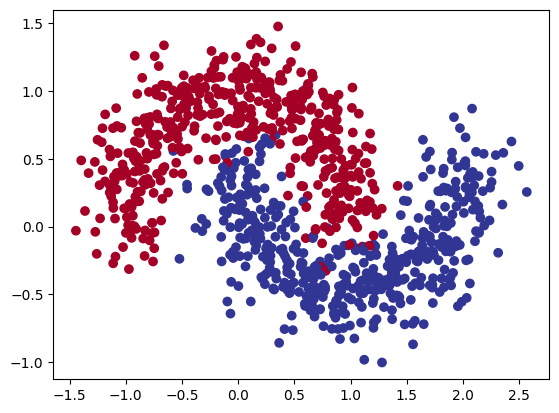

In [133]:
# plotting data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [134]:
# from reading the data, the data is not linear it's non-linear, we will have to 
# introduce non-linear maybe a Relu to our model
class BinaryClassMakeMoon(nn.Module):
    def __init__(self, inFeatures, outFeatures, hidden_layer=10):
        super().__init__()
        self.linear_seq_layer = nn.Sequential(
            nn.Linear(in_features=inFeatures,
                      out_features=hidden_layer),
            nn.ReLU(),
            nn.Linear(in_features=hidden_layer,
                      out_features=hidden_layer),
            nn.ReLU(),
            nn.Linear(in_features=hidden_layer,
                      out_features=outFeatures)
        )

    def forward(self, x: torch.Tensor)-> torch.Tensor :
        return self.linear_seq_layer(x)

In [135]:
NUM_FEATURES = 2
NUM_CLASSES = 1

# turn data to tensor float 32
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)
X[:5], y[:5]

(tensor([[-0.1117,  0.5202],
         [ 1.1426, -0.3426],
         [ 0.7956, -0.0114],
         [ 0.1118, -0.5519],
         [-0.8165,  0.5440]]),
 tensor([1., 1., 1., 1., 0.]))

OrderedDict([('linear_seq_layer.0.weight',
              tensor([[-0.4702,  0.2777],
                      [ 0.6950, -0.0334],
                      [-0.0032,  0.0779],
                      [-0.4629, -0.1738],
                      [ 0.4703,  0.3607],
                      [-0.5031, -0.3337],
                      [-0.3500, -0.2641],
                      [ 0.6387,  0.1093],
                      [ 0.2934,  0.3705],
                      [-0.4438, -0.0033]])),
             ('linear_seq_layer.0.bias',
              tensor([ 0.5251, -0.1775,  0.2227, -0.4925, -0.6491, -0.6709,  0.1094, -0.4197,
                       0.5686, -0.3806])),
             ('linear_seq_layer.2.weight',
              tensor([[ 0.2305,  0.0729,  0.0935,  0.2961,  0.2003, -0.1812, -0.1556,  0.2204,
                       -0.1151, -0.2444],
                      [-0.0639,  0.2719, -0.2634, -0.1562, -0.2567,  0.0019,  0.2837,  0.0767,
                       -0.0056,  0.0921],
                      [ 0.1888, -0.2749

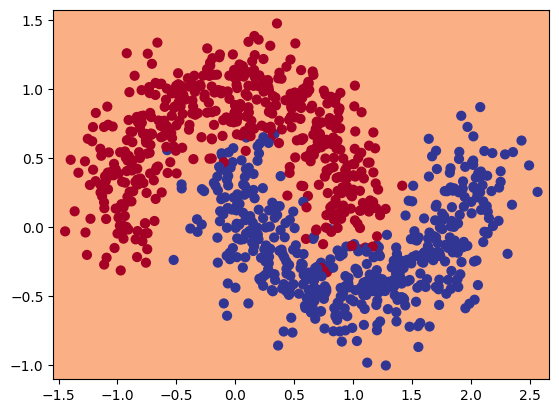

In [136]:
model = BinaryClassMakeMoon(NUM_FEATURES, NUM_CLASSES)
plot_decision_boundary(model, X, y)
model.state_dict()

In [137]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

In [138]:
X_train[:5], y_train[:5]

(tensor([[ 2.1397,  0.3731],
         [-1.2067,  0.4169],
         [-0.2117,  1.1715],
         [-0.0632,  0.9842],
         [ 0.3938, -0.1620]]),
 tensor([1., 0., 0., 0., 1.]))

In [139]:
# Loss function needed to calculate the difference between prediction and actual value during training
# need a binary loss function since it's a binary output
loss_fn = nn.BCEWithLogitsLoss()

# optimizer is needed to update weights and bias of model after loss is calculated
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [140]:
def acc(y_pred, y_test):
    true_value = torch.eq(y_pred, y_test).sum().item()
    return 100*true_value/len(y_test)

Epoch: 0, Train Acc: 50.0, Train-Loss: 0.6954429745674133, Test Acc: 50.0, Test-Loss: 0.6942351460456848
Epoch: 100, Train Acc: 80.75, Train-Loss: 0.3959462344646454, Test Acc: 79.0, Test-Loss: 0.4142979383468628
Epoch: 200, Train Acc: 86.875, Train-Loss: 0.29607832431793213, Test Acc: 85.5, Test-Loss: 0.29989001154899597
Epoch: 300, Train Acc: 87.75, Train-Loss: 0.2724422216415405, Test Acc: 87.0, Test-Loss: 0.2709956169128418
Epoch: 400, Train Acc: 88.375, Train-Loss: 0.2585919201374054, Test Acc: 88.0, Test-Loss: 0.254655122756958
Epoch: 500, Train Acc: 89.125, Train-Loss: 0.23901599645614624, Test Acc: 89.5, Test-Loss: 0.23245656490325928
Epoch: 600, Train Acc: 90.875, Train-Loss: 0.2103489488363266, Test Acc: 91.5, Test-Loss: 0.2017640620470047
Epoch: 700, Train Acc: 92.625, Train-Loss: 0.17761334776878357, Test Acc: 92.5, Test-Loss: 0.16649429500102997
Epoch: 800, Train Acc: 94.875, Train-Loss: 0.147422656416893, Test Acc: 95.5, Test-Loss: 0.13416501879692078
Epoch: 900, Train Ac

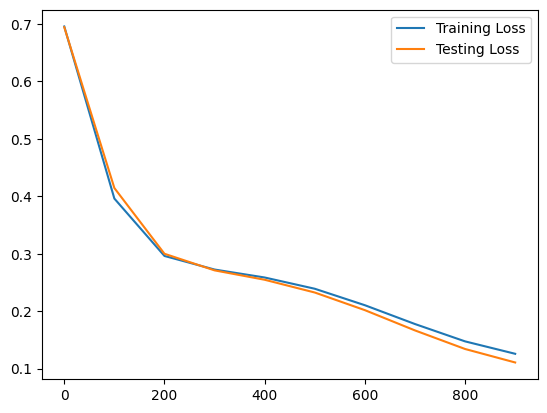

In [141]:
epochs = 1000
epoch_count = []
training_loss = []
testing_loss = []

training_acc = []
testing_acc = []

for epoch in range(epochs):
    model.train() # set model to training mode

    #1. do the forward pass
    logits = model(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(logits))
    # 2 calculate loss
    train_loss = loss_fn(logits, y_train.squeeze())

    # 3. set grad 0 on everage pass so when doing gradient calculation
    optimizer.zero_grad()
    # 4. backpropagation
    train_loss.backward()
    #5. gradient descent
    optimizer.step()

    # Test
    model.eval()
    with torch.inference_mode():
        # forward pass
        test_logits = model(X_test).squeeze()
        test_y_pred = torch.round(torch.sigmoid(test_logits))

        # test loss
        test_loss = loss_fn(test_logits, y_test)

        if epoch % 100 == 0:
            training_loss.append(train_loss.numpy())
            testing_loss.append(test_loss.numpy())
            epoch_count.append(epoch)
            
            test_acc = acc(test_y_pred, y_test)
            train_acc = acc(y_pred, y_train)
            training_acc.append(train_acc)
            testing_acc.append(test_acc)
            
            print(f"Epoch: {epoch}, Train Acc: {train_acc}, Train-Loss: {train_loss}, Test Acc: {test_acc}, Test-Loss: {test_loss}")
            
plt.plot(epoch_count, training_loss, label='Training Loss')
plt.plot(epoch_count, testing_loss, label='Testing Loss')
plt.legend()
plt.show()

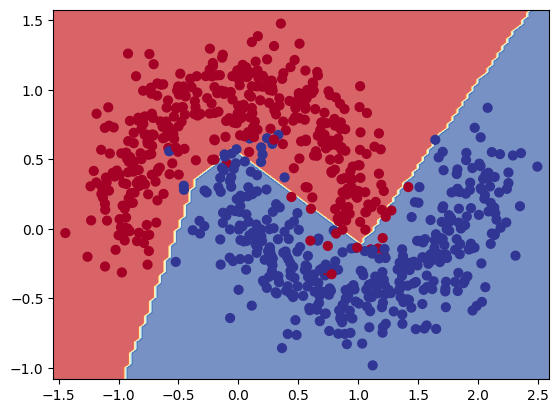

In [142]:
plot_decision_boundary(model, X_train, y_train)